In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
data = pd.read_csv('../../data/clustering_data/경기데이터.csv')

In [4]:
data

,시군,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,...,합계출산율,도시지역면적,주택,전체대비주택비율,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
0,수원시,1194465,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,...,0.890,121182030,354566,0.086990,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439
1,성남시,942724,0.06,0.00,10,50,86074070.0,62.0,0.767902,0.063562,...,0.852,141820898,251281,0.061650,0.001772,0.172351,0.198688,0.253128,0.241703,0.134130
2,의정부시,451868,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,...,0.847,81598380,142635,0.034994,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722
3,안양시,567044,0.06,0.10,30,600,20391808.0,62.1,0.733692,0.086717,...,0.980,58480054,171744,0.042136,0.002937,0.173936,0.200810,0.241278,0.258014,0.125962
4,부천시,829996,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,...,0.807,53450000,255150,0.062599,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295
5,광명시,316552,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,...,0.840,38506473,99721,0.024466,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789
6,평택시,513027,0.06,0.10,30,360,10543560.0,63.8,0.722968,0.105638,...,1.102,151090527,171851,0.042162,0.001137,0.198596,0.193366,0.265432,0.224345,0.118261
7,동두천시,94768,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,...,0.854,33565811,33510,0.008221,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349
8,안산시,650918,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,...,0.887,151472339,193891,0.047569,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521
9,고양시,1066351,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,...,0.802,194127720,313254,0.076854,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944


In [5]:
# 할인율_한시의 결측치를 할인율_상시로 대체
data['할인율_상시'] = data['할인율_상시'].fillna(0)
data['구매한도_월'] = data['구매한도_월'].fillna(0)
data['구매한도_연'] = data['구매한도_연'].fillna(0)
data['할인율_한시'] = np.where(pd.notnull(data['할인율_한시']) == True, data['할인율_한시'], data['할인율_상시'])

In [6]:
# 종사자 제거
data = data.drop(['제조업종사자비율','도소매업종사자비율', '운수업종사자비율'], axis=1)

In [7]:
# '성남시', '안양시', '평택시', '시흥시', '김포시', '포천시', '의왕시'
idx = data[data['시군'].isin(['성남시', '안양시', '평택시', '시흥시', '김포시', '포천시', '의왕시'])].index
data = data.drop(idx)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 30
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           24 non-null     object 
 1   총인구수         24 non-null     int64  
 2   할인율_상시       24 non-null     float64
 3   할인율_한시       24 non-null     float64
 4   구매한도_월       24 non-null     int64  
 5   구매한도_연       24 non-null     int64  
 6   지역화폐사용액(천원)  24 non-null     float64
 7   경제활동참가율      24 non-null     float64
 8   서비스업사업체비율    24 non-null     float64
 9   제조업사업체비율     24 non-null     float64
 10  도소매업사업체비율    24 non-null     float64
 11  운수업사업체비율     24 non-null     float64
 12  농업가구비율       24 non-null     float64
 13  합계출산율        24 non-null     float64
 14  도시지역면적       24 non-null     int64  
 15  주택           24 non-null     int64  
 16  전체대비주택비율     24 non-null     float64
 17  면적대비주택비율     24 non-null     float64
 18  미성년비율        24 non-null     float64
 19  청년비율      

### 1) Normalization

In [9]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [10]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [11]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

### 2) PCA

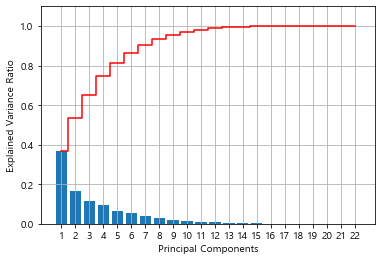

In [12]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [13]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:14]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], 
                    columns=['Cum_V_ration'])

df_v

##주성분 10개 원래 데이터의 약 96% 설명

,Cum_V_ration
PC1,0.368336
PC2,0.535152
PC3,0.650634
PC4,0.745696
PC5,0.812193
PC6,0.866505
PC7,0.906722
PC8,0.936722
PC9,0.955160
PC10,0.969871


In [14]:
printcipalComponents = pca.fit_transform(x_df)

In [15]:
pca_data = pd.DataFrame(printcipalComponents[:,:10], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
                        , index = y)

In [16]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
수원시,-3.705753,-1.798749,2.378619,0.375188,-0.476508,0.991262,1.534393,-0.358850,0.682414,0.273648
의정부시,-0.212309,-2.230302,-0.090184,-0.009690,0.107246,-0.253489,0.406222,-0.622982,-0.033498,0.307933
부천시,-2.496373,-1.732838,2.861605,-1.957667,-0.592677,2.106702,-1.105159,-0.447018,0.146204,-0.776489
광명시,-0.492383,-1.608033,-1.169325,-0.374744,0.261451,0.918694,0.021778,-0.451873,-0.160994,-0.080336
동두천시,2.073340,-2.073178,-1.052372,-0.616912,0.337387,-1.535964,-0.527268,-1.215319,-0.405326,-0.023223
안산시,-2.264828,-1.050548,1.156109,-3.132665,0.124066,-1.574850,-0.982690,2.138367,-0.986948,0.788765
고양시,-2.658533,-1.940650,2.430586,0.924976,-0.156067,-0.690085,-0.172318,0.509141,0.655074,-0.082957
과천시,1.623501,-3.276779,-2.195883,2.003492,-0.144448,-0.424461,-0.799364,1.119022,0.310705,-0.618940
구리시,0.451358,-1.698173,-1.854886,1.189990,-0.182223,1.439674,-0.297884,0.129292,-0.204958,0.495226
남양주시,-1.893872,0.635022,0.090216,2.249165,0.023419,-0.876761,-0.903419,-0.809027,-0.311138,0.155521


### 3) K-Means Clustering

1. elbow

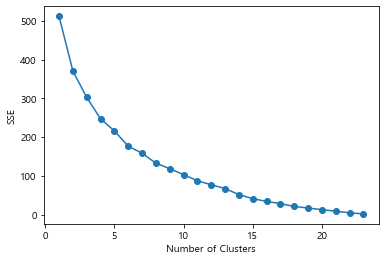

In [17]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 24)

2. silhouette

Range of SC Interpretation  
0.71-1.0 A strong structure has been found  
0.51-0.70 A reasonable structure has been found  
0.26-0.50 The structure is weak and could be artificial  
< 0.25 No substantial structure has been found  

In [18]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 0}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 24):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_data)
    score = sklearn.metrics.silhouette_score(pca_data, kmeans.labels_)
    silhouette_coefficients.append(score)

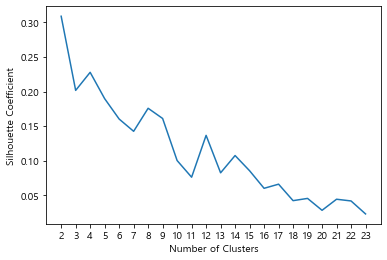

In [19]:
plt.plot(range(2, 24), silhouette_coefficients)
plt.xticks(range(2, 24))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

3. gap stastics  
https://anaconda.org/milesgranger/gap-statistic/notebook

In [20]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
            # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal   
        

In [21]:
k, gapdf = optimalK(pca_data, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

Optimal k is:  14


C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


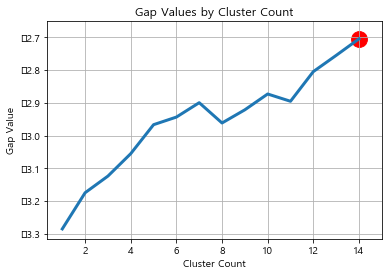

In [22]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=8).fit(pca_data)

In [24]:
pca_data['cluster_id'] = kmeans.labels_

In [25]:
clust_data = pca_data

In [26]:
clust_data.sort_values(by='cluster_id')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster_id
수원시,-3.705753,-1.798749,2.378619,0.375188,-0.476508,0.991262,1.534393,-0.358850,0.682414,0.273648,0
부천시,-2.496373,-1.732838,2.861605,-1.957667,-0.592677,2.106702,-1.105159,-0.447018,0.146204,-0.776489,0
고양시,-2.658533,-1.940650,2.430586,0.924976,-0.156067,-0.690085,-0.172318,0.509141,0.655074,-0.082957,0
용인시,-3.461318,0.650722,1.322171,3.221483,-0.199293,-1.532936,0.653060,-0.461855,-0.305493,0.773023,0
양주시,0.119522,2.318468,-1.234515,0.490319,-0.270042,-0.260858,-1.786455,-0.630246,-0.421947,-0.217927,1
광주시,-0.655108,2.043727,-0.559325,-1.243794,2.943331,-0.634694,-1.110605,-0.073579,1.852676,0.668577,1
안성시,1.102114,2.134974,-0.423187,-0.409971,-0.663155,0.017901,0.259275,0.435908,0.220960,-0.492076,1
파주시,-0.938496,0.881457,-0.569234,-0.801876,0.026543,-0.395296,0.169592,-1.073199,0.109794,-0.823970,1
남양주시,-1.893872,0.635022,0.090216,2.249165,0.023419,-0.876761,-0.903419,-0.809027,-0.311138,0.155521,1
군포시,-0.594784,0.666498,-0.530012,-0.753345,-0.527820,1.844527,-1.079370,-0.695193,-1.013319,0.550401,1


In [27]:
data['cluster_id'] = kmeans.labels_

In [40]:
data.to_csv('../../data/clustering_data/경기클러스터.csv', index=False)

### 4) Visualization

In [29]:
data

,시군,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,...,도시지역면적,주택,전체대비주택비율,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율,cluster_id
0,수원시,1194465,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,...,121182030,354566,0.086990,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439,0
2,의정부시,451868,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,...,81598380,142635,0.034994,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722,3
4,부천시,829996,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,...,53450000,255150,0.062599,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295,0
5,광명시,316552,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,...,38506473,99721,0.024466,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789,3
7,동두천시,94768,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,...,33565811,33510,0.008221,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349,3
8,안산시,650918,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,...,151472339,193891,0.047569,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521,7
9,고양시,1066351,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,...,194127720,313254,0.076854,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944,0
10,과천시,58289,0.06,0.10,40,480,6683191.0,55.3,0.802449,0.021497,...,35853000,12927,0.003172,0.000361,0.189792,0.182328,0.233121,0.254748,0.140010,3
11,구리시,199265,0.06,0.10,50,600,4011320.0,60.5,0.752936,0.055844,...,33292067,57693,0.014154,0.001733,0.179944,0.186969,0.252163,0.254689,0.126236,3
12,남양주시,701830,0.06,0.10,50,600,12979396.0,57.8,0.674129,0.149824,...,242423014,221641,0.054378,0.000914,0.208847,0.158515,0.269458,0.231260,0.131919,1


1. dendrogram

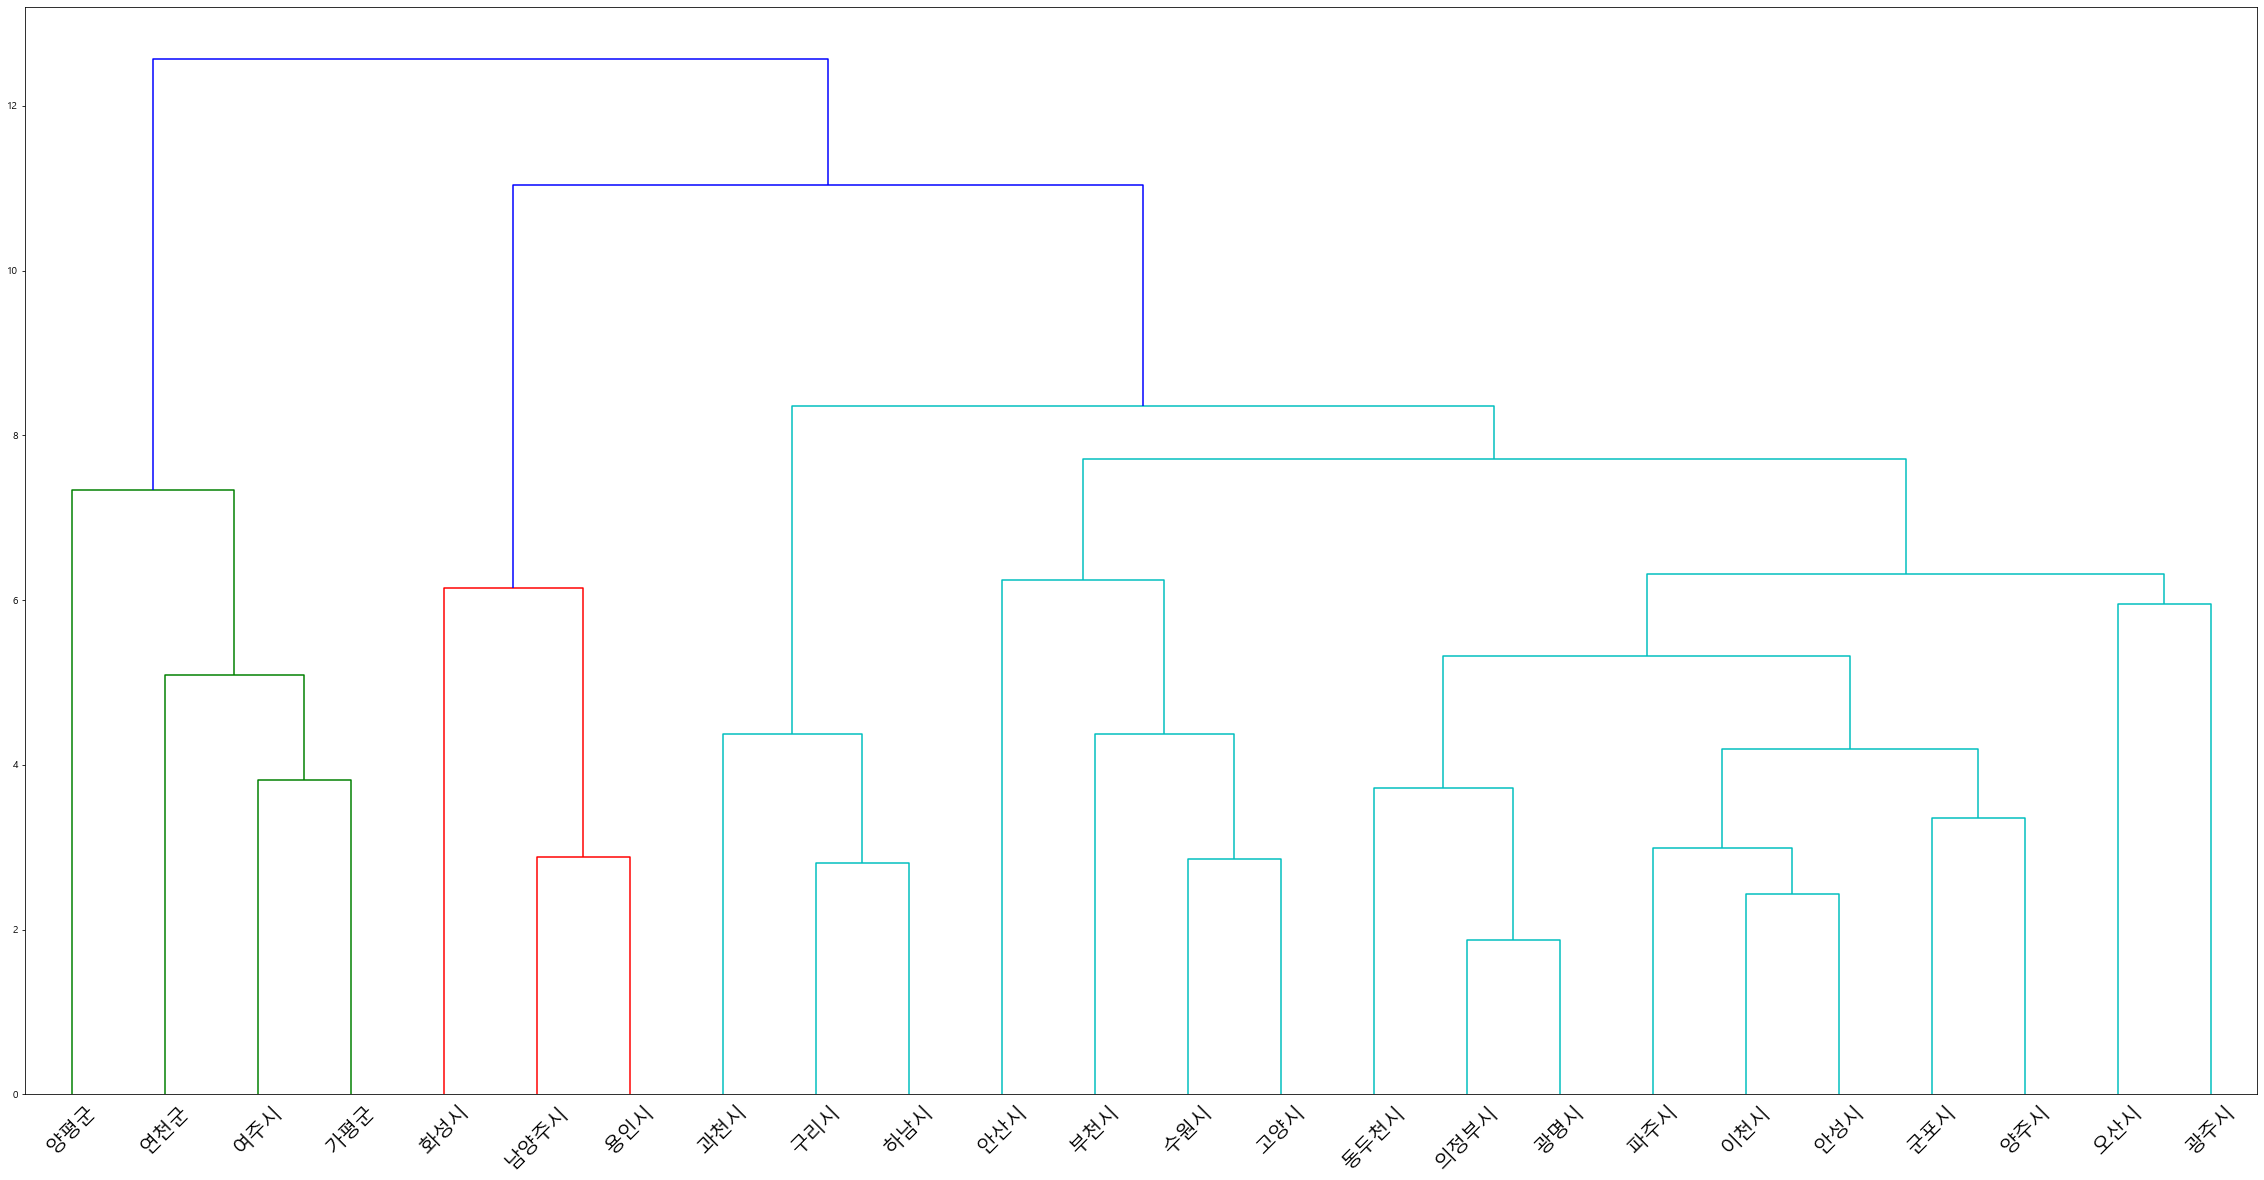

In [30]:
link_data = pca_data.drop(['cluster_id'], axis = 1)
mergings = linkage(link_data,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings, labels = link_data.index, leaf_font_size=20)
plt.show()

2. cluster별 시/군

In [31]:
data_dict = {}
for i in range(8):
    dict_list = []
    for j in data.index:
        if data['cluster_id'][j] == i:
            dict_list.append(data['시군'][j])
    data_dict[i] = dict_list    

gg_cluster = pd.DataFrame.from_dict(data_dict, orient = 'index').fillna(' ')
gg_cluster

,0,1,2,3,4,5
0,수원시,부천시,고양시,용인시,,
1,남양주시,군포시,파주시,안성시,광주시,양주시
2,여주시,연천군,가평군,,,
3,의정부시,광명시,동두천시,과천시,구리시,하남시
4,양평군,,,,,
5,오산시,이천시,,,,
6,화성시,,,,,
7,안산시,,,,,


3. 시/군별 평균 시각화

In [32]:
data_mean = data.set_index('시군').groupby('cluster_id').mean()

In [33]:
data_mean.columns

Index(['총인구수', '할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',
       '경제활동참가율', '서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율', '농업가구비율',
       '합계출산율', '도시지역면적', '주택', '전체대비주택비율', '면적대비주택비율', '미성년비율', '청년비율',
       '중년비율', '장년비율', '노년비율'],
      dtype='object')

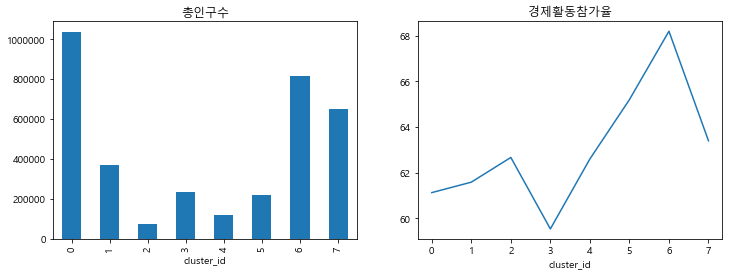

In [34]:
# 인구 ['총인구수','미성년비율','청년비율', '중년비율','장년비율','노년비율']
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['총인구수'].plot(kind='bar',ax = axes[0], legend = False, title = '총인구수')
data_mean['경제활동참가율'].plot(ax = axes[1], legend = False, title = '경제활동참가율')

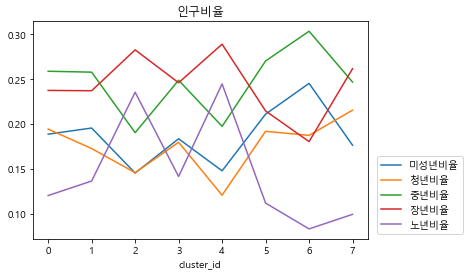

In [35]:
data_mean[['미성년비율','청년비율', '중년비율','장년비율','노년비율']].plot(title = '인구비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

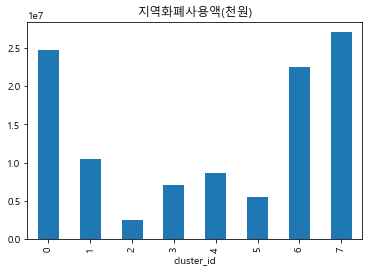

In [36]:
# 지역화폐 ['할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',]
data_mean['지역화폐사용액(천원)'].plot(kind='bar',legend = False, title = '지역화폐사용액(천원)')

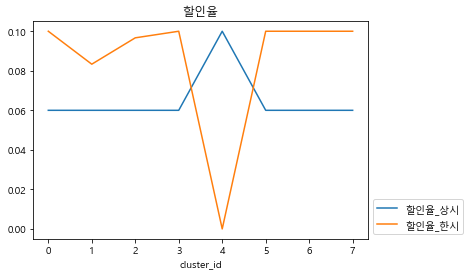

In [37]:
data_mean[['할인율_상시', '할인율_한시']].plot(title = '할인율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

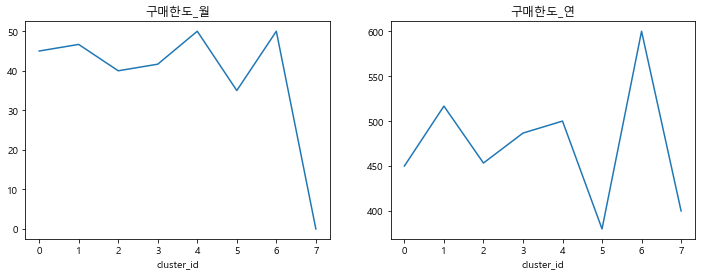

In [38]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['구매한도_월'].plot(ax = axes[0], title = '구매한도_월')
data_mean['구매한도_연'].plot(ax = axes[1], title = '구매한도_연')

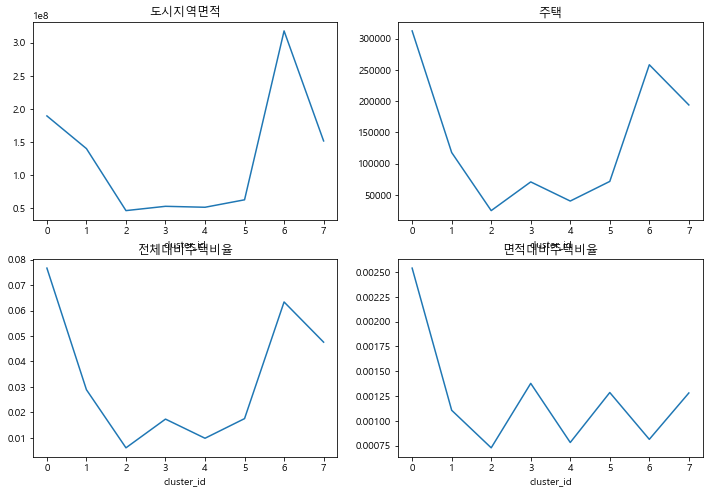

In [39]:
# 면적 및 주택 ['도시지역면적', '주택', '전체대비주택비율', '면적대비주택비율']
fig, axes = plt.subplots(2,2,figsize=(12,8))
data_mean['도시지역면적'].plot(ax = axes[0, 0], title = '도시지역면적')
data_mean['주택'].plot(ax = axes[0, 1], title = '주택')
data_mean['전체대비주택비율'].plot(ax = axes[1, 0], title = '전체대비주택비율')
data_mean['면적대비주택비율'].plot(ax = axes[1, 1], title = '면적대비주택비율')

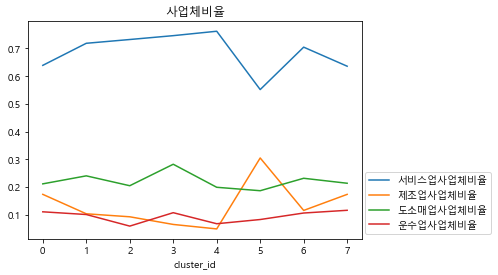

In [44]:
# 사업체비율 ['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']
data_mean[['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']].plot(title = '사업체비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.4, 0))